# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
key='yourKey'
from project_lib import Project
project = Project(project_id='key', project_access_token='key')
pc = project.project_context


# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
# from project_lib import Project
# project = Project(project_id='1030672b-5168-4fb8-af4e-baf398d185cc', project_access_token='p-61234ba00d53ae89ddfc5d74d2ae08278a020840')
# pc = project.project_context


!pip install seaborn --upgrade

# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [224]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [225]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


<hr>

## Loading the .csv dataset from GitHub

In [226]:
import pandas as pd

In [227]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

--2020-09-05 02:10:47--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv.4’

100%[======================================>] 92,376      --.-K/s   in 0.005s  

2020-09-05 02:10:47 (17.4 MB/s) - ‘ForTraining.csv.4’ saved [92376/92376]



,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [228]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head()

--2020-09-05 02:10:48--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv.4’

100%[======================================>] 63,920      --.-K/s   in 0.003s  

2020-09-05 02:10:48 (21.2 MB/s) - ‘OrdenMaterias.csv.4’ saved [63920/63920]



,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [229]:
df_orden_materias

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...
5,Alim. Y Nut. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Trastornos de la conducta alimentaria (TCA),"Alimentación, crecimiento y desarrollo",Ambiente y conductas obesogénicas,Antecedentes y evolución de la alimentación,Composición corporal y metabolismo,Trastornos de la conducta alimentaria (TCA),"Alimentación, crecimiento y desarrollo",Ambiente y conductas obesogénicas,Antecedentes y evolución de la alimentación,Composición corporal y metabolismo
6,Analitica Web,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Marketing Analytics,Big data y Business Analyitics,Análisis y métrica web,Herramientas y optimización web,Análisis SEM/SEO
7,Autolesion,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Introducción a las conductas de autolesión no ...,Sin clase,Sin clase,Sin clase,Sin clase,Introducción a las conductas de autolesión no ...,Causas asociadas a las conductas de autolesión...,"Relación entre espacios cibernéticos, redes so..."
8,B. I.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Data Visualization: Llevando Power BI al límite.,Big data y Business Analyitics,Making Sense of Data: Modelación predictiva,Business Understanding: Pensamiento analítico ...,Data Driven Decisions,Data Visualization: Llevando Power BI al límite.,Big data y Business Analyitics,Business Understanding: Pensamiento analítico ...,Making Sense of Data: Modelación predictiva,Data Driven Decisions
9,Bien. Salud y Calidad,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Los cinco prin

In [230]:
df_base_for_training[df_base_for_training.studentId==81328.0]

,studentId,reducido,ciclo,Graduado
1541,81328.0,Edu. Preescolar,2019 - 05,Si


In [231]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
# df_tabla_conexiones.head()

--2020-09-05 02:10:49--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv.4’

100%[======================================>] 243,492     --.-K/s   in 0.01s   

2020-09-05 02:10:49 (22.2 MB/s) - ‘TablaConexiones.csv.4’ saved [243492/243492]



In [232]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
# df_tabla_tareas.head()

--2020-09-05 02:10:50--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv.4’

100%[======================================>] 310,923     --.-K/s   in 0.01s   

2020-09-05 02:10:51 (20.4 MB/s) - ‘TablaTareas.csv.4’ saved [310923/310923]



Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

In [233]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [234]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [235]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [236]:
df_tabla_tareas[df_tabla_tareas.studentId==91320]

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
4928,91320.0,2019 - 08,71.818182,9.0,2.0,0.0,11.0


In [237]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId','ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0


In [238]:
df = pd.merge(
    df, df_tabla_conexiones , how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

In [239]:
# df = pd.merge(
#     df, df_orden_materias  , how='inner',
#     on=None, left_on=['reducido'], right_on=['reducido'],
#     left_index=False, right_index=False, sort=True,
#     suffixes=('_x', '_y'), copy=True, indicator=False,
#     validate=None
# )
# from sklearn.utils import resample
# df_resample = resample(df, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=8000 ,    # to match majority class
#                                  random_state=123)

# df = pd.concat([df, df_resample])

In [240]:
df.columns

Index(['studentId', 'reducido', 'ciclo', 'Graduado', 'Calificacion_Promedio',
       'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas',
       'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total'],
      dtype='object')

In [241]:
# Información acerca de las columnas del dataset unido
df_orden_materias 

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...
5,Alim. Y Nut. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Trastornos de la conducta alimentaria (TCA),"Alimentación, crecimiento y desarrollo",Ambiente y conductas obesogénicas,Antecedentes y evolución de la alimentación,Composición corporal y metabolismo,Trastornos de la conducta alimentaria (TCA),"Alimentación, crecimiento y desarrollo",Ambiente y conductas obesogénicas,Antecedentes y evolución de la alimentación,Composición corporal y metabolismo
6,Analitica Web,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Marketing Analytics,Big data y Business Analyitics,Análisis y métrica web,Herramientas y optimización web,Análisis SEM/SEO
7,Autolesion,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Introducción a las conductas de autolesión no ...,Sin clase,Sin clase,Sin clase,Sin clase,Introducción a las conductas de autolesión no ...,Causas asociadas a las conductas de autolesión...,"Relación entre espacios cibernéticos, redes so..."
8,B. I.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Data Visualization: Llevando Power BI al límite.,Big data y Business Analyitics,Making Sense of Data: Modelación predictiva,Business Understanding: Pensamiento analítico ...,Data Driven Decisions,Data Visualization: Llevando Power BI al límite.,Big data y Business Analyitics,Business Understanding: Pensamiento analítico ...,Making Sense of Data: Modelación predictiva,Data Driven Decisions
9,Bien. Salud y Calidad,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Los cinco prin

De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

### Borrando finlas con valores NaN

Usando el metodo Pandas DataFrame.dropna() usted puede remover todas las filas que estan indefinidas para la columna ``Graduado``.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [242]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación DropNA: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de la transformación DropNA: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



In [243]:
# Aplicando la función para borrar todas las filas con valor NaN en la columna ``Graduado``:
df2 = df.dropna(axis='index', how='any', subset=['Graduado'])

In [244]:
# Visualizando los datos faltantes del dataset antes de la primera transformación (SimpleImputer) (df_data_3)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los otros valores NaN vamos a usar como **ejemplo** la sustitución por la constante 0. 

Usted puede escoger cualquier estrategia que crea que es la mejor para esto :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [245]:
df2

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72
5,46180.0,Mercadotecnia,2017 - 03,No,76.641333,13.0,2.0,0.0,15.0,30.0,691.944667,20758.34
6,46324.0,Direc. Proy.,2017 - 03,Si,84.000000,13.0,2.0,0.0,15.0,80.0,296.228500,23698.28
7,46366.0,Planeacion Estrat.,2017 - 03,No,30.000000,6.0,9.0,0.0,15.0,12.0,483.498333,5801.98
8,46374.0,Educacion,2017 - 03,Si,66.833333,8.0,3.0,1.0,12.0,35.0,273.005429,9555.19
9,46443.0,Educacion,2017 - 03,Si,83.285833,11.0,0.0,1.0,12.0,37.0,457.599459,16931.18


In [246]:
# Visualizando los datos faltantes del dataset antes de la segunda transformación (df_data_2)
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np


# Creando un objeto ``SimpleImputer``
imputer_knn = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='mean',  # La estrategia escogida es reemplazar por una constante
#     fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)


impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='most_frequent',  # La estrategia escogida es reemplazar por una constante
#     fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)
# Aplicar la transformación ``SimpleImputer`` en el conjunto de datos base
impute_zeros.fit(X=df2)
imputer_knn.fit(X=df2[['Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'Dias_Conectado','Minutos_Promedio','Minutos_Total']])




df2[['Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'Dias_Conectado','Minutos_Promedio','Minutos_Total']]= imputer_knn.transform(X=df2[['Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'Dias_Conectado','Minutos_Promedio','Minutos_Total']])





# Reconstrucción del nuevo DataFrame Pandas (df_data_3)


# Visualizndo los datos faltantes del dataset 
print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64

Valores nulos del dataset despues de la transformación SimpleImputer: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



In [247]:
df3=df2

In [248]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3.tail()
df3['Porcentaje_Tareas_Puntuales'] = df3['Tareas_Puntuales']/df3['Total_Tareas']
df3['Porcentaje_Tareas_No_Entregadas'] = df3['Tareas_No_Entregadas']/df3['Total_Tareas']
df3['EntregoTodas'] = (df3['Tareas_Puntuales']/df3['Total_Tareas']>0.90).astype(int)
df3['NoEntregoAlgunaTarea'] = (df3['Tareas_No_Entregadas']>0).astype(int)
df3['PromedioMayorMedia'] = (df3['Calificacion_Promedio']>60).astype(int)
df3 = df3.drop(columns=[], inplace=False)                    
df3['Dias_Conectado'] = np.where(df3['Dias_Conectado'] > 100, 100, df3['Dias_Conectado'])
df3['Minutos_Total'] = np.where(df3['Minutos_Total'] > 40000, 40000, df3['Minutos_Total'])
df3['Minutos_Promedio'] = np.where(df3['Minutos_Promedio'] > 500, 500, df3['Minutos_Promedio'])
df3['Tareas_Puntuales'] = np.where(df3['Tareas_Puntuales'] > 15, 15, df3['Tareas_Puntuales'])
df3['Promedio'] =df3['Dias_Conectado']+df3['Calificacion_Promedio']
df3['Promedio'] = round(df3['Promedio']/10 )
df3['Calificacion_Promedio'] = round(df3['Calificacion_Promedio']/10 )
df3['Dias_Conectado'] = round(df3['Dias_Conectado']/10 )


In [249]:
df3

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Porcentaje_Tareas_Puntuales,Porcentaje_Tareas_No_Entregadas,EntregoTodas,NoEntregoAlgunaTarea,PromedioMayorMedia,Promedio
0,45898.0,Mercadotecnia,2017 - 03,Si,7.0,13.0,2.0,0.0,15.0,3.0,370.231250,11847.40,0.866667,0.133333,0,1,1,10.0
1,45905.0,Intro. Fin,2017 - 03,No,9.0,9.0,0.0,0.0,9.0,5.0,198.717400,9935.87,1.000000,0.000000,1,0,1,14.0
2,45931.0,Direc. Proy.,2017 - 03,No,6.0,12.0,2.0,1.0,15.0,2.0,294.535909,6479.79,0.800000,0.133333,0,1,1,9.0
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,8.0,8.0,0.0,4.0,12.0,3.0,471.421379,13671.22,0.666667,0.000000,0,0,1,11.0
4,46106.0,Gest. Esc.,2017 - 03,Si,7.0,11.0,3.0,1.0,15.0,3.0,306.023226,9486.72,0.733333,0.200000,0,1,1,10.0
5,46180.0,Mercadotecnia,2017 - 03,No,8.0,13.0,2.0,0.0,15.0,3.0,500.000000,20758.34,0.866667,0.133333,0,1,1,11.0
6,46324.0,Direc. Proy.,2017 - 03,Si,8.0,13.0,2.0,0.0,15.0,8.0,296.228500,23698.28,0.866667,0.133333,0,1,1,16.0
7,46366.0,Planeacion Estrat.,2017 - 03,No,3.0,6.0,9.0,0.0,15.0,1.0,483.498333,5801.98,0.400000,0.600000,0,1,0,4.0
8,46374.0,Educacion,2017 - 03,Si,7.0,8.0,3.0,1.0,12.0,4.0,273.005429,9555.19,0.666667,0.250000,0,1,1,10.0
9,46443.0,Educacion,2017 - 03,Si,8.0,11.0,0.0,1.0,12.0,4.0,457.599459,16931.18,0.916667,0.000000,1,0,1,12.0


In [250]:
df3['ciclo'] =df3['ciclo'].str[0:4]
a1= df3[df3.ciclo == '2017']
a2= df3[df3.ciclo == '2018']
a3= df3[df3.ciclo == '2019']


a4= df3[df3.Minutos_Total > 15000]
a5= df3[df3.Minutos_Total < 15000]

In [251]:
graduados= df3[df3.Graduado == 'Si']
noGraduados= df3[df3.Graduado == 'No']

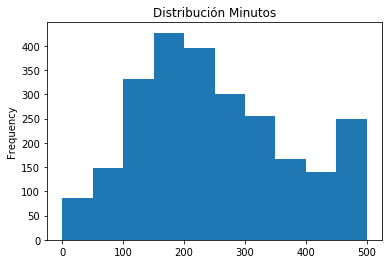

In [252]:
df3['Minutos_Promedio'].plot.hist(title='Distribución Minutos', bins=10)

In [253]:
# df3 = pd.get_dummies(df3, columns=['ciclo'])

In [254]:
df3.columns

Index(['studentId', 'reducido', 'ciclo', 'Graduado', 'Calificacion_Promedio',
       'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas',
       'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total',
       'Porcentaje_Tareas_Puntuales', 'Porcentaje_Tareas_No_Entregadas',
       'EntregoTodas', 'NoEntregoAlgunaTarea', 'PromedioMayorMedia',
       'Promedio'],
      dtype='object')

In [255]:
from sklearn.utils import resample

df4 = df3

df_minority_upsampled = resample(a1, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000 ,    # to match majority class
                                 ) # reproducible results
df_mayority_upsampled = resample(a2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000 ,    # to match majority class
                                 ) 
df_mayority_upsampled2 = resample(a3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000 ,    # to match majority class
                                 )
df3 = pd.concat([df3, df_minority_upsampled,df_mayority_upsampled, df_mayority_upsampled2 ])



df3 = pd.get_dummies(df3, columns=[ 'ciclo'])
df3 = pd.get_dummies(df3, columns=[ 'reducido'])
df4 = pd.get_dummies(df4, columns=[ 'reducido'])
df4 = pd.get_dummies(df4, columns=[ 'ciclo'])


In [256]:
df3.columns[8:]

Index(['Minutos_Promedio', 'Minutos_Total', 'Porcentaje_Tareas_Puntuales',
       'Porcentaje_Tareas_No_Entregadas', 'EntregoTodas',
       'NoEntregoAlgunaTarea', 'PromedioMayorMedia', 'Promedio', 'ciclo_2017',
       'ciclo_2018', 'ciclo_2019', 'reducido_Adm. Emp.',
       'reducido_Adm. Riesgos', 'reducido_Adm. Salud', 'reducido_Admon Fin.',
       'reducido_Alim. Y Nut. Salud', 'reducido_B. I.',
       'reducido_Bien. Salud y Calidad', 'reducido_Big Data',
       'reducido_Big Data en Edu', 'reducido_Blockchain',
       'reducido_Bus. Analytics', 'reducido_Calidad Educativa',
       'reducido_Ciberseguridad', 'reducido_Cloud Computing',
       'reducido_Coaching Edu.', 'reducido_Coaching de Vida',
       'reducido_Com. Corp.', 'reducido_Comp. Dig. Docentes',
       'reducido_Comp. Directivas', 'reducido_Comp. Doc. S XXI',
       'reducido_Crianza Hijos', 'reducido_Dere. Sanitario',
       'reducido_Des. Cap. Hum.', 'reducido_Des. Neg. y Empren.',
       'reducido_Des. Videojuegos',

### Dividiendo nuestro dataset en set de Entrenamiento y Pruebas

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
features = df3[
   ['Dias_Conectado','Tareas_Puntuales','Porcentaje_Tareas_Puntuales',
       'Porcentaje_Tareas_No_Entregadas','EntregoTodas',	'NoEntregoAlgunaTarea',	'PromedioMayorMedia'	,'Promedio',
        'Tareas_No_Entregadas',
'Minutos_Promedio', 'Minutos_Total',
'Calificacion_Promedio', 'ciclo_2017', 'ciclo_2018', 'ciclo_2019','reducido_Adm. Emp.', 'reducido_Adm. Riesgos', 'reducido_Adm. Salud',
       'reducido_Admon Fin.', 'reducido_Alim. Y Nut. Salud', 'reducido_B. I.',
       'reducido_Bien. Salud y Calidad', 'reducido_Big Data',
       'reducido_Big Data en Edu', 'reducido_Blockchain',
      'reducido_Calidad Educativa',
       'reducido_Ciberseguridad', 'reducido_Cloud Computing',
      'reducido_Coaching de Vida',
       'reducido_Com. Corp.', 'reducido_Comp. Dig. Docentes',
       'reducido_Comp. Directivas', 
       'reducido_Crianza Hijos', 'reducido_Dere. Sanitario',
       'reducido_Des. Cap. Hum.', 'reducido_Des. Neg. y Empren.',
       'reducido_Des. Videojuegos', 'reducido_Desarrollo Mot.',
       'reducido_Design Think', 'reducido_Diagn. Psicoped.',
       'reducido_Direc. Emp. Fam.', 'reducido_Direc. Estrat. Neg',
       'reducido_Direc. Proy.', 
       'reducido_E-Commerce', 'reducido_E. Lectoescritura',
       'reducido_Edu. Preescolar',
       'reducido_Edu. Primaria', 'reducido_Educacion',
       'reducido_Efect. Cap. Hum.',
       'reducido_Est. Temprana', 'reducido_Estrat. Comercial',
       'reducido_Estrategia Tal. Hum.', 'reducido_Exp. Clin. Elec.',
       'reducido_Fin. Corp. Avan.', 'reducido_Fintech', 'reducido_Gest. Esc.',
       'reducido_Gest. Tal.', 
       'reducido_Hab. Geren.', 'reducido_Hist. Arte. Ant.',
       'reducido_Hist. Arte. Clasico', 'reducido_Hist. Arte. Medieval',
       'reducido_I. A.', 'reducido_Inc. Edu.', 
       'reducido_Inn. Diseno Edu.', 'reducido_Inn. Negocios',
       'reducido_Inn. Tec. Edu.', 'reducido_Interv. Edu.',
       'reducido_Interv. Psicoped', 'reducido_Intro. Fin',
       'reducido_Inv. Mercados', 'reducido_Lider. Inst. Edu.',
       'reducido_Lit. Lat. S. XX', 'reducido_Marca Personal',
       'reducido_Mercadotecnia', 'reducido_Mkt. Digital',
       'reducido_Mkt. Farmaceutico',
    
       'reducido_Neuromarketing', 'reducido_Obesidad. Inf.',
       'reducido_Oren. Edu. Fam', 'reducido_P. Aux. Psic.',
       'reducido_Planeacion Estrat.', 'reducido_Precios Transf.',
       'reducido_Prin. Fiscales', 'reducido_Prof. Deportiva.',
       'reducido_Prog. Neuroling.', 'reducido_Programacion de Apps',
       'reducido_Prot. Datos. P', 'reducido_Psicopat. Adol.',
       'reducido_Psicoped. Escolar', 
       'reducido_Trastornos Alimen.', 'reducido_Ventas Estrat.'
]
]
target = df3['Graduado']



features2 = df4[
    ['Dias_Conectado','Tareas_Puntuales','Porcentaje_Tareas_Puntuales',
       'Porcentaje_Tareas_No_Entregadas','EntregoTodas',	'NoEntregoAlgunaTarea',	'PromedioMayorMedia'	,'Promedio',
        'Tareas_No_Entregadas',
'Minutos_Promedio', 'Minutos_Total',
'Calificacion_Promedio', 'ciclo_2017', 'ciclo_2018', 'ciclo_2019','reducido_Adm. Emp.', 'reducido_Adm. Riesgos', 'reducido_Adm. Salud',
       'reducido_Admon Fin.', 'reducido_Alim. Y Nut. Salud', 'reducido_B. I.',
       'reducido_Bien. Salud y Calidad', 'reducido_Big Data',
       'reducido_Big Data en Edu', 'reducido_Blockchain',
      'reducido_Calidad Educativa',
       'reducido_Ciberseguridad', 'reducido_Cloud Computing',
      'reducido_Coaching de Vida',
       'reducido_Com. Corp.', 'reducido_Comp. Dig. Docentes',
       'reducido_Comp. Directivas', 
       'reducido_Crianza Hijos', 'reducido_Dere. Sanitario',
       'reducido_Des. Cap. Hum.', 'reducido_Des. Neg. y Empren.',
       'reducido_Des. Videojuegos', 'reducido_Desarrollo Mot.',
       'reducido_Design Think', 'reducido_Diagn. Psicoped.',
       'reducido_Direc. Emp. Fam.', 'reducido_Direc. Estrat. Neg',
       'reducido_Direc. Proy.', 
       'reducido_E-Commerce', 'reducido_E. Lectoescritura',
       'reducido_Edu. Preescolar',
       'reducido_Edu. Primaria', 'reducido_Educacion',
       'reducido_Efect. Cap. Hum.',
       'reducido_Est. Temprana', 'reducido_Estrat. Comercial',
       'reducido_Estrategia Tal. Hum.', 'reducido_Exp. Clin. Elec.',
       'reducido_Fin. Corp. Avan.', 'reducido_Fintech', 'reducido_Gest. Esc.',
       'reducido_Gest. Tal.', 
       'reducido_Hab. Geren.', 'reducido_Hist. Arte. Ant.',
       'reducido_Hist. Arte. Clasico', 'reducido_Hist. Arte. Medieval',
       'reducido_I. A.', 'reducido_Inc. Edu.', 
       'reducido_Inn. Diseno Edu.', 'reducido_Inn. Negocios',
       'reducido_Inn. Tec. Edu.', 'reducido_Interv. Edu.',
       'reducido_Interv. Psicoped', 'reducido_Intro. Fin',
       'reducido_Inv. Mercados', 'reducido_Lider. Inst. Edu.',
       'reducido_Lit. Lat. S. XX', 'reducido_Marca Personal',
       'reducido_Mercadotecnia', 'reducido_Mkt. Digital',
       'reducido_Mkt. Farmaceutico',
    
       'reducido_Neuromarketing', 'reducido_Obesidad. Inf.',
       'reducido_Oren. Edu. Fam', 'reducido_P. Aux. Psic.',
       'reducido_Planeacion Estrat.', 'reducido_Precios Transf.',
       'reducido_Prin. Fiscales', 'reducido_Prof. Deportiva.',
       'reducido_Prog. Neuroling.', 'reducido_Programacion de Apps',
       'reducido_Prot. Datos. P', 'reducido_Psicopat. Adol.',
       'reducido_Psicoped. Escolar', 
       'reducido_Trastornos Alimen.', 'reducido_Ventas Estrat.'
]
]
target2 = df4['Graduado']
sc =QuantileTransformer()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.9)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [258]:


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

### Entrenando un modelo ``DecisionTreeClassifier()``

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.930\nPrecision=0.926\nRecall=0.946\nF1 Score=0.9359933499584372')

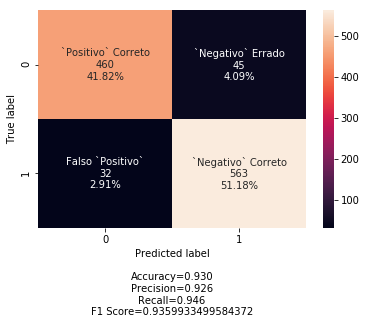

In [259]:
# Método para creacion de modelos basados en arbol de desición
# model1=SVC(C=0.3,  kernel='linear',)
# model2=MLPClassifier()
kernel = 0.5 * RBF(1.0)
dtc = RandomForestClassifier().fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)
# VotingClassifier(estimators=[('1',model1),('2',model2)]).fit(X_train, y_train)

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.978\nPrecision=0.973\nRecall=0.983\nF1 Score=0.9783549783549782')

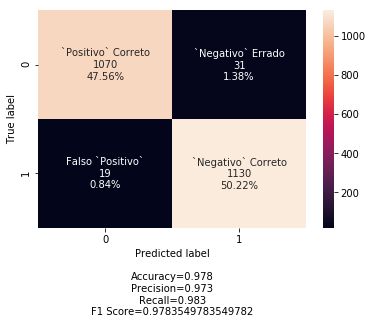

In [260]:
kernel = 0.5 * RBF(1.0)
# dtc = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred2 = dtc.predict(X_test2)
cf_matrix = confusion_matrix(y_test2, y_pred2)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)
# VotingClassifier(estimators=[('1',model1),('2',model2)]).fit(X_train, y_train)

In [261]:
# dtc.feature_importances_

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [262]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')
df_to_be_predicted.tail()

--2020-09-05 02:10:55--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33892 (33K) [text/plain]
Saving to: ‘ToBePredicted.csv.3’

100%[======================================>] 33,892      --.-K/s   in 0.001s  

2020-09-05 02:10:55 (25.1 MB/s) - ‘ToBePredicted.csv.3’ saved [33892/33892]



,studentId,reducido,ciclo
995,79594.0,Diagn. Psicoped.,2019 - 05
996,69470.0,Ventas Estrat.,2018 - 08
997,72921.0,Big Data,2019 - 02
998,80608.0,Interv. Psicoped,2019 - 05
999,86966.0,Interv. Psicoped,2019 - 07


In [263]:
# Uniendo los dataset
df = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df = pd.merge(
    df, df_tabla_conexiones , how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)


# Creando un objeto ``SimpleImputer``
imputer_knn = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='mean',  # La estrategia escogida es reemplazar por una constante
#     fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)


impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='most_frequent',  # La estrategia escogida es reemplazar por una constante
#     fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)
# Aplicar la transformación ``SimpleImputer`` en el conjunto de datos base
impute_zeros.fit(X=df)
imputer_knn.fit(X=df[['Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'Dias_Conectado','Minutos_Promedio','Minutos_Total']])




df[['Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'Dias_Conectado','Minutos_Promedio','Minutos_Total']]= imputer_knn.transform(X=df[['Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'Dias_Conectado','Minutos_Promedio','Minutos_Total']])








# Reconstrucción del nuevo DataFrame Pandas (df_data_3)
df3 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df
    ),  # El resultado SimpleImputer.transform(<<pandas dataframe>>) es una lista de listas
    columns=df.columns  # Las columnas originals deben ser conservadas en esta transformación
)




df3['Porcentaje_Tareas_Puntuales'] = df3['Tareas_Puntuales']/df3['Total_Tareas']
df3['Porcentaje_Tareas_No_Entregadas'] = df3['Tareas_No_Entregadas']/df3['Total_Tareas']
df3['EntregoTodas'] = (df3['Tareas_Puntuales']/df3['Total_Tareas']>0.90).astype(int)
df3['NoEntregoAlgunaTarea'] = (df3['Tareas_No_Entregadas']>0).astype(int)
df3['PromedioMayorMedia'] = (df3['Calificacion_Promedio']>60).astype(int)
df3 = df3.drop(columns=[], inplace=False)                    
df3['Dias_Conectado'] = np.where(df3['Dias_Conectado'] > 100, 100, df3['Dias_Conectado'])
df3['Minutos_Total'] = np.where(df3['Minutos_Total'] > 40000, 40000, df3['Minutos_Total'])
df3['Minutos_Promedio'] = np.where(df3['Minutos_Promedio'] > 500, 500, df3['Minutos_Promedio'])
df3['Tareas_Puntuales'] = np.where(df3['Tareas_Puntuales'] > 15, 15, df3['Tareas_Puntuales'])
df3['Promedio'] =df3['Dias_Conectado']+df3['Calificacion_Promedio']
df3['Promedio'] = round(df3['Promedio']/10 )
df3['Calificacion_Promedio'] = round(df3['Calificacion_Promedio']/10 )
df3['Dias_Conectado'] = round(df3['Dias_Conectado']/10 )
df3['ciclo'] =df3['ciclo'].str[0:4]
df3 = pd.get_dummies(df3, columns=[ 'ciclo'])
df3 = pd.get_dummies(df3, columns=[ 'reducido'])









In [264]:
features = df3[
   ['Dias_Conectado','Tareas_Puntuales','Porcentaje_Tareas_Puntuales',
       'Porcentaje_Tareas_No_Entregadas','EntregoTodas',	'NoEntregoAlgunaTarea',	'PromedioMayorMedia'	,'Promedio',
        'Tareas_No_Entregadas',
'Minutos_Promedio', 'Minutos_Total',
'Calificacion_Promedio', 'ciclo_2017', 'ciclo_2018', 'ciclo_2019','reducido_Adm. Emp.', 'reducido_Adm. Riesgos', 'reducido_Adm. Salud',
       'reducido_Admon Fin.', 'reducido_Alim. Y Nut. Salud', 'reducido_B. I.',
       'reducido_Bien. Salud y Calidad', 'reducido_Big Data',
       'reducido_Big Data en Edu', 'reducido_Blockchain',
      'reducido_Calidad Educativa',
       'reducido_Ciberseguridad', 'reducido_Cloud Computing',
      'reducido_Coaching de Vida',
       'reducido_Com. Corp.', 'reducido_Comp. Dig. Docentes',
       'reducido_Comp. Directivas', 
       'reducido_Crianza Hijos', 'reducido_Dere. Sanitario',
       'reducido_Des. Cap. Hum.', 'reducido_Des. Neg. y Empren.',
       'reducido_Des. Videojuegos', 'reducido_Desarrollo Mot.',
       'reducido_Design Think', 'reducido_Diagn. Psicoped.',
       'reducido_Direc. Emp. Fam.', 'reducido_Direc. Estrat. Neg',
       'reducido_Direc. Proy.', 
       'reducido_E-Commerce', 'reducido_E. Lectoescritura',
       'reducido_Edu. Preescolar',
       'reducido_Edu. Primaria', 'reducido_Educacion',
       'reducido_Efect. Cap. Hum.',
       'reducido_Est. Temprana', 'reducido_Estrat. Comercial',
       'reducido_Estrategia Tal. Hum.', 'reducido_Exp. Clin. Elec.',
       'reducido_Fin. Corp. Avan.', 'reducido_Fintech', 'reducido_Gest. Esc.',
       'reducido_Gest. Tal.', 
       'reducido_Hab. Geren.', 'reducido_Hist. Arte. Ant.',
       'reducido_Hist. Arte. Clasico', 'reducido_Hist. Arte. Medieval',
       'reducido_I. A.', 'reducido_Inc. Edu.', 
       'reducido_Inn. Diseno Edu.', 'reducido_Inn. Negocios',
       'reducido_Inn. Tec. Edu.', 'reducido_Interv. Edu.',
       'reducido_Interv. Psicoped', 'reducido_Intro. Fin',
       'reducido_Inv. Mercados', 'reducido_Lider. Inst. Edu.',
       'reducido_Lit. Lat. S. XX', 'reducido_Marca Personal',
       'reducido_Mercadotecnia', 'reducido_Mkt. Digital',
       'reducido_Mkt. Farmaceutico',
    
       'reducido_Neuromarketing', 'reducido_Obesidad. Inf.',
       'reducido_Oren. Edu. Fam', 'reducido_P. Aux. Psic.',
       'reducido_Planeacion Estrat.', 'reducido_Precios Transf.',
       'reducido_Prin. Fiscales', 'reducido_Prof. Deportiva.',
       'reducido_Prog. Neuroling.', 'reducido_Programacion de Apps',
       'reducido_Prot. Datos. P', 'reducido_Psicopat. Adol.',
       'reducido_Psicoped. Escolar', 
       'reducido_Trastornos Alimen.', 'reducido_Ventas Estrat.'
]
]
sc =PowerTransformer()
x = sc.fit_transform(features)


In [265]:
y_pred = dtc.predict(x)

In [266]:
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Si',
       'Si', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Si', 'No', 'No', 'No', 'Si', 'No', 'No', 'Si', 'Si', 'Si', 'No',
       'No', 'Si', 'No', 'No', 'No', 'Si', 'No', 'Si', 'Si', 'No', 'Si',
       'Si', 'Si', 'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'Si', 'No',
       'No', 'No', 'No', 'No', 'Si', 'Si', 'Si', 'Si', 'No', 'No', 'Si',
       'Si', 'Si', 'No', 'Si', 'Si', 'Si', 'Si', 'No', 'Si', 'Si', 'No',
       'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'Si',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'Si', 'No', 'No',
       'No', 'No', 'Si', 'No', 'Si', 'No', 'No', 'Si', 'Si', 'No', 'No',
       'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Si', 'No', 'Si', 'Si', 'Si', 'No', 'Si', 'No', 'No', 'Si', 'No',
       'Si', 'Si', 'No', 'Si', 'Si', 'No', 'Si', 'No', 'Si', 'No', 'No',
       'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'N

Observando los features declarados acontinuación, sabemos que el dataset ha ser evaluado esta en el mismo formato usado para entrenar nuestro árbol de decisión anteriormente.

```features = df3[
    [
        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
        'ciclo_2019 - 08'
    ]
]
target = df3['Graduado']  ## No cambie la variable target!```

In [267]:
df3.columns

Index(['studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total',
       'Porcentaje_Tareas_Puntuales', 'Porcentaje_Tareas_No_Entregadas',
       'EntregoTodas', 'NoEntregoAlgunaTarea', 'PromedioMayorMedia',
       'Promedio', 'ciclo_2017', 'ciclo_2018', 'ciclo_2019',
       'reducido_Adm. Emp.', 'reducido_Adm. Riesgos', 'reducido_Adm. Salud',
       'reducido_Admon Fin.', 'reducido_Alim. Y Nut. Salud', 'reducido_B. I.',
       'reducido_Bien. Salud y Calidad', 'reducido_Big Data',
       'reducido_Big Data en Edu', 'reducido_Blockchain',
       'reducido_Calidad Educativa', 'reducido_Ciberseguridad',
       'reducido_Cloud Computing', 'reducido_Coaching de Vida',
       'reducido_Com. Corp.', 'reducido_Comp. Dig. Docentes',
       'reducido_Comp. Directivas', 'reducido_Crianza Hijos',
       'reducido_Dere. Sanitario', 'reducido_Des. Cap. Hum.',
       'redu

In [268]:
np.unique(y_pred)

array(['No', 'Si'], dtype=object)

### Guardando los resultados de la predicción en un archivo csv

np.savetxt("results.csv", y_pred, delimiter=",", fmt='%s')

In [270]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio6-donotdelete-pr-rnf3b76y7jurcy',
 'asset_id': '3795c977-d3cf-4630-b9c6-91521748a579'}

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
